In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/kaggle/input/urbansounds/UrbanSound8K/audio/fold1/101415-3-0-8.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
print(librosa_audio_data)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[ 0.23264292  0.3517679   0.29677212 ... -0.002873   -0.00120905
 -0.00118477]


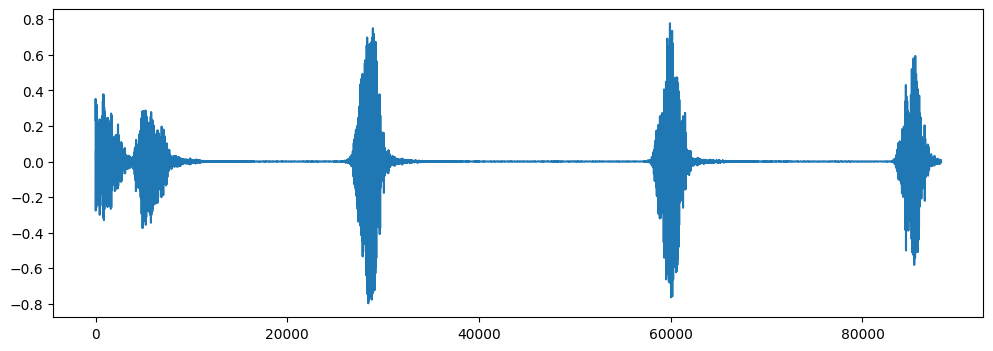

In [4]:

### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)


In [5]:
librosa_sample_rate
# it defines how many times per second a sound is sampled

22050

In [6]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [7]:
import pandas as pd
metadata=pd.read_csv('/kaggle/input/urbansounds/UrbanSound8K/metadata/UrbanSound8K.csv')

In [8]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

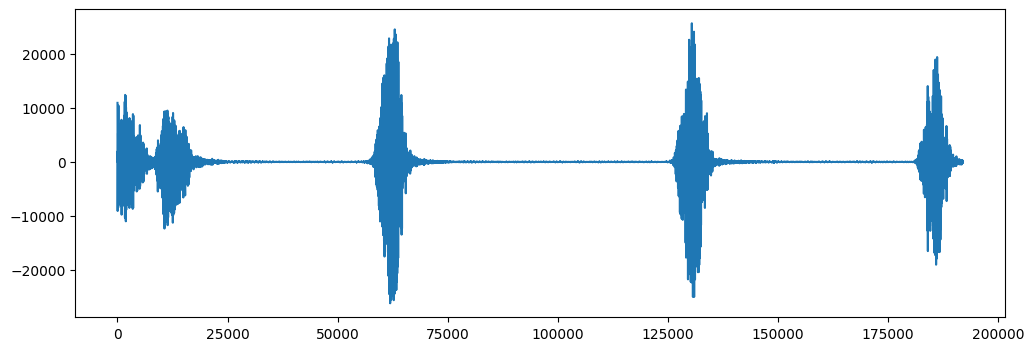

In [10]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [11]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [12]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [13]:
import pandas as pd
import os
import librosa

audio_dataset_path='/kaggle/input/urbansounds/UrbanSound8K/audio'
metadata=pd.read_csv('/kaggle/input/urbansounds/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [15]:
!pip install resampy


In [17]:
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm

max_pad_len = 174  # Corrected variable name

def extract_features(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')  # Load audio without resampling
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]  # Corrected variable name
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')  # Corrected variable name
    return mfccs

features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = extract_features(file_name)
    features.append([data, final_class_labels])


3555it [07:51,  7.30it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [18:10, 11.54it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [19:01,  7.65it/s]


In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(features,columns=['feature','class'])
print('Finished feature extraction from ', len(extracted_features_df), ' files')

Finished feature extraction from  8732  files


In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(extracted_features_df.feature.tolist())
y = np.array(extracted_features_df["class"].tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

In [21]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

In [23]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [24]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 86, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [26]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 250


model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)


Epoch 1/100
28/28 [==============================] - 1s 43ms/step - loss: 0.2296 - accuracy: 0.9210 - val_loss: 0.3179 - val_accuracy: 0.9033
Epoch 2/100
28/28 [==============================] - 1s 24ms/step - loss: 0.2398 - accuracy: 0.9141 - val_loss: 0.3239 - val_accuracy: 0.8981
Epoch 3/100
28/28 [==============================] - 1s 24ms/step - loss: 0.2175 - accuracy: 0.9258 - val_loss: 0.3401 - val_accuracy: 0.8941
Epoch 4/100
28/28 [==============================] - 1s 25ms/step - loss: 0.2151 - accuracy: 0.9241 - val_loss: 0.3338 - val_accuracy: 0.8952
Epoch 5/100
28/28 [==============================] - 1s 25ms/step - loss: 0.2237 - accuracy: 0.9238 - val_loss: 0.3835 - val_accuracy: 0.8746
Epoch 6/100
28/28 [==============================] - 1s 25ms/step - loss: 0.2166 - accuracy: 0.9236 - val_loss: 0.3537 - val_accuracy: 0.8884
Epoch 7/100
28/28 [==============================] - 1s 25ms/step - loss: 0.2164 - accuracy: 0.9278 - val_loss: 0.3102 - val_accuracy: 0.9113
Epoch 

In [27]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9934144616127014
Testing Accuracy:  0.9273039698600769


In [54]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict(prediction_feature)
    predicted_class_indices = np.argmax(predicted_vector, axis=1)
    predicted_class = le.inverse_transform(predicted_class_indices) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba = predicted_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )


In [55]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])


In [56]:
# Class: Air Conditioner

filename = '/kaggle/input/urbansounds/UrbanSound8K/audio/fold7/104625-4-0-51.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 48ms/step
The predicted class is: drilling 

air_conditioner 		 :  0.00023881645756773650646209716797
car_horn 		 :  0.00004562466710922308266162872314
children_playing 		 :  0.00000217572437577473465353250504
dog_bark 		 :  0.00000177892195551976328715682030
drilling 		 :  0.99912863969802856445312500000000
engine_idling 		 :  0.00002839318585756700485944747925
gun_shot 		 :  0.00000000014196022135593011626042
jackhammer 		 :  0.00000315918191517994273453950882
siren 		 :  0.00003019246832991484552621841431
street_music 		 :  0.00052125961519777774810791015625


In [57]:
model.save('/kaggle/working/audio_classification_model2.h5')
